In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
Image_size = [224, 224]

In [3]:
train_path = 'Datasets/Train'
#test_path = 'Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=Image_size + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('Datasets/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
pred = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=pred)

In [9]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
#test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4763 images belonging to 5 classes.


In [15]:
#test_set = test_datagen.flow_from_directory('Datasets/Test',
 #                                           target_size = (224, 224),
  #                                          batch_size = 32,
   #                                         class_mode = 'categorical')

In [16]:
# fit the model
y = model.fit_generator(
  training_set,
  #validation_data=test_set,
  epochs=10,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

Epoch 1/10
149/149 [==============================] - 973s 7s/step - loss: 0.0889 - accuracy: 0.9746
Epoch 2/10
149/149 [==============================] - 984s 7s/step - loss: 0.0059 - accuracy: 0.9992
Epoch 3/10
149/149 [==============================] - 1082s 7s/step - loss: 0.0044 - accuracy: 0.9992
Epoch 4/10
149/149 [==============================] - 955s 6s/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/10
149/149 [==============================] - 1067s 7s/step - loss: 0.0015 - accuracy: 0.9998
Epoch 6/10
149/149 [==============================] - 1032s 7s/step - loss: 0.0014 - accuracy: 0.9998
Epoch 7/10
149/149 [==============================] - 1125s 8s/step - loss: 0.0013 - accuracy: 0.9998
Epoch 8/10
149/149 [==============================] - 1014s 7s/step - loss: 0.0015 - accuracy: 0.9992
Epoch 9/10
149/149 [==============================] - 985s 7s/step - loss: 4.6036e-04 - accuracy: 1.0000
Epoch 10/10
149/149 [==============================] - 992s 7s/step - loss: 5.7354

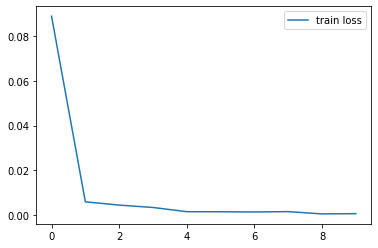

<Figure size 432x288 with 0 Axes>

In [17]:
# loss
plt.plot(y.history['loss'], label='train loss')
#plt.plot(y.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

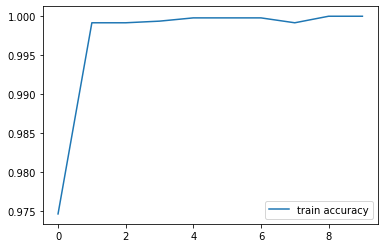

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(y.history['accuracy'], label='train accuracy')
#plt.plot(y.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [19]:
import tensorflow as tf

from keras.models import load_model

In [20]:
model.save('face_model_new_2.h5')